In [100]:
import random
import matplotlib.pyplot as plt

In [101]:
TOTAL_MOVEMENTS = 1700
TOTAL_SIMS = 10000

AVERAGE_TRACTOR_SPEED = 23 #kmph

IDLE_MINS_AT_SOURCE = 2
IDLE_MINS_AT_DIGESTER = 2

IDLE_LOAD_MODE_VALUE = 0.75  #kg C02 per min
lOW_LOAD_MODE_VALUE = 0.75  #kg C02 per min
MEDIUM_LOAD_MODE_VALUE = 2.3 #kg CO2 per min
HEAVY_LOAD_MODE_VALUE = 2.3 #kg CO2 per min

TRACTOR_LOAD_PROFILE = 1 #0 = unloaded both ways, 1 = loaded one way, unloaded the other, 2 = loaded both ways


In [102]:
SOURCE_DISTANCE = [3,5,8,10] #kms from digester

def get_rnd_distance():
    
    return random.choice(SOURCE_DISTANCE)
        

In [103]:
def get_rnd_value_from_range(lower, upper):
    
    return random.uniform(lower, upper)

In [104]:
def main():
    
    data = []
    x = range(TOTAL_SIMS)
    for sim in x:
    
        y = range(TOTAL_MOVEMENTS)
        total_co2 = 0
        for movement in y:
            
            distance = get_rnd_distance()
            
            trip_time_one_way = distance / (AVERAGE_TRACTOR_SPEED/60)
            
            loaded_em = get_rnd_value_from_range(lOW_LOAD_MODE_VALUE,MEDIUM_LOAD_MODE_VALUE)
            
            movement_co2 = ( (IDLE_MINS_AT_SOURCE * IDLE_LOAD_MODE_VALUE) + 
                            (trip_time_one_way * get_rnd_value_from_range(lOW_LOAD_MODE_VALUE,MEDIUM_LOAD_MODE_VALUE)) +
                            (IDLE_MINS_AT_DIGESTER * IDLE_LOAD_MODE_VALUE) +
                            (trip_time_one_way * lOW_LOAD_MODE_VALUE) )
            
            total_co2 += movement_co2
            #print (loaded_em)
        
        data.append(total_co2)                        
            
    #print (data) 
    plt.hist(data) #plotting the column as histogram 
    
    

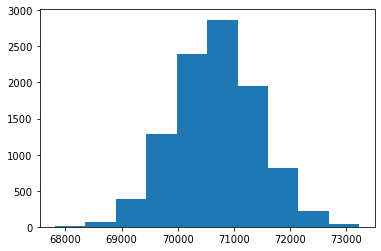

In [105]:
main()